In [1]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, gdal
from descartes import PolygonPatch
path1="E:/Thesis/Data/cropped/SVDNB_npp_20190401-20190430_75N060E_vcmslcfg_v10_c201905191000.avg_rade9h.tif"
path2="E:/Thesis/Data/cropped/SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif"
path3="E:/Thesis/Data/cropped/SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.cf_cvg.tif"
gmappath="E:/Thesis/Data/cropped/bdgmapzoom7_2.tif"

In [2]:
def grid_tile(src):
    plt.imshow(src.read(1), cmap='pink')
    plt.grid(color='w', linestyle='-', linewidth=2)
    plt.show()

In [3]:
def cut_Tile(img,tile_size_x,tile_size_y,output_filename):
    #in_path = 'E:/Thesis/Data/cropped/'
    #input_filename = 'F182013.v4c_web.stable_lights.avg_vis.tif'
 
    out_path = 'E:/Thesis/Data/dara/'
    #output_filename = "tile_"
 
    #tile_size_x = 50
    #tile_size_y = 70
 
    ds = gdal.Open(img)
    band = ds.GetRasterBand(1)
    xsize = band.XSize
    ysize = band.YSize
 
    for i in range(0, xsize, tile_size_x):
        for j in range(0, ysize, tile_size_y):
            com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(img) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
            os.system(com_string)

In [4]:
def superposition(src1,src2,opacity):
     plt.imshow(src1.read(1), cmap="terrain")
     plt.imshow(src2.read(1), clim=(0, 75), cmap="prism", alpha = opacity)
     plt.show()
def plot(src):
    plt.imshow(src.read(1), cmap='pink')
    plt.figure(figsize = (7,7))
    plt.show()

In [5]:
def center(ds):
    gt = ds.GetGeoTransform()
    width_px = ds.RasterXSize
    height_px = ds.RasterYSize
    ulx, xres, xskew, uly, yskew, yres  = ds.GetGeoTransform()
    lrx = ulx + (ds.RasterXSize * xres)
    lry = uly + (ds.RasterYSize * yres)
    center_x = (ulx+lrx)/2
    center_y = (uly+lry)/2
    return center_x,center_y

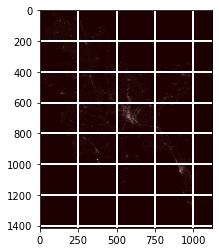

In [6]:
src = rasterio.open(path1)
grid_tile(src)


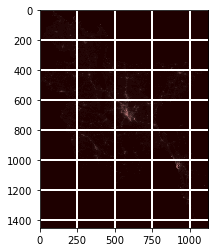

In [7]:
src = rasterio.open(path2)
grid_tile(src)


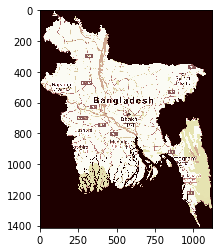

<Figure size 504x504 with 0 Axes>

In [8]:
src = rasterio.open(gmappath)
plot(src)

In [9]:
cut_Tile(path2,100,100,"tile_")
cut_Tile(gmappath,100,100,"gtile_")

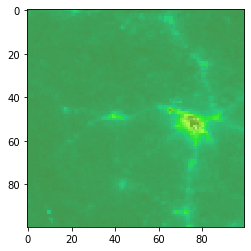

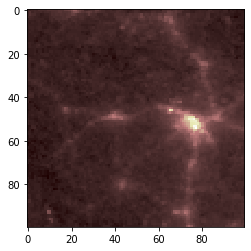

<Figure size 504x504 with 0 Axes>

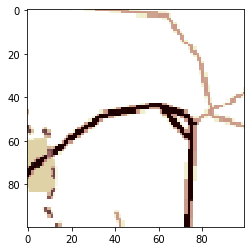

<Figure size 504x504 with 0 Axes>

In [10]:
src1=rasterio.open("E:/Thesis/Data/dara/tile_500_400.tif")
src2=rasterio.open("E:/Thesis/Data/dara/gtile_500_400.tif")
superposition(src1,src2,0.5)
plot(src1)
plot(src2)

In [11]:
c1=gdal.Open("E:/Thesis/Data/dara/tile_500_400.tif")
c2=gdal.Open("E:/Thesis/Data/dara/gtile_500_400.tif")
cx1,cy1=center(c1)
cx2,cy2=center(c2)
print(cx1,cx2,cy1,cy2)

90.29791690905 90.90708782588604 24.76041626475 24.266472619297296


In [12]:
c1=gdal.Open("E:/Thesis/Data/dara/tile_300_500.tif")
c2=gdal.Open("E:/Thesis/Data/dara/gtile_300_500.tif")
cx1,cy1=center(c1)
cx2,cy2=center(c2)
print(cx1,cx2,cy1,cy2)

89.46458356905 89.85335510302366 24.343749594749994 23.739606257866114


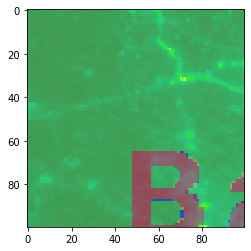

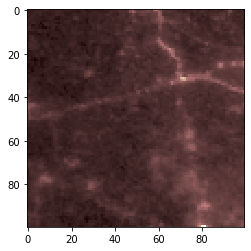

<Figure size 504x504 with 0 Axes>

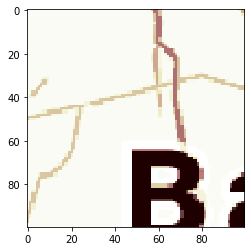

<Figure size 504x504 with 0 Axes>

In [13]:
src1=rasterio.open("E:/Thesis/Data/dara/tile_300_500.tif")
src2=rasterio.open("E:/Thesis/Data/dara/gtile_300_500.tif")

superposition(src1,src2,0.5)
plot(src1)
plot(src2)